# ¡Hola Alejandro!

Mi nombre es Sofia Arboleda, estaré ayudándote a revisar este proyecto para que quede en su mejor versión.

Para simular la dinámica de un ambiente de trabajo, si veo algún error, en primer instancia solo los señalaré, dándote la oportunidad de encontrarlos y corregirlos por tu cuenta. Esto es útil para que te acostumbres a un escenario laboral. En caso de que no puedas resolver la tarea, te daré una información más precisa en la próxima revisión.

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo funciona esta revisión? Leeré atentamente tu código y te señalaré tus fortalezas y aquellas cosas que podemos mejorar. Los comentarios aparecerán de esta forma:


<div class="alert alert-block alert-success">
<b>Comentario de la revisora</b> <a class="tocSkip"></a>

Si todo está perfecto y no se requieren cambios en el código.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario de la revisora</b> <a class="tocSkip"></a>

Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta. Se aceptan uno o dos comentarios de este tipo en el borrador, pero si hay más, deberás hacer las correcciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de la revisora</b> <a class="tocSkip"></a>

Si definitivamente hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma si algo no queda claro (copia este código en una celda markdown):

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Hola, muchas gracias por tus comentarios y la revisión.        
</div>

# Experimento A/B en página de inicio

El objetivo de este proyecto es evaluar un **experimento A/B** realizado en una página de inicio (landing page) con versiónes **A y B** para apoyar una **decisión de negocio basada en datos**.

---

El archivo `landing_experiment.csv` contiene información de usuarios expuestos a dos versiones de la página de inicio (landing page) dentro del experimento A/B. Incluye región, dispositivo, fuente de tráfico, tipo de usuario, conversión y gasto.

El análisis sigue una lógica clara y progresiva:

1. 🔍 Explorar y validar los datos.

2. 💰 Comparar el **gasto promedio** por usuario entre la página A y B.

3. 🎯 Comparar la **tasa de conversión** entre la página A y B.

4. 🌐 Revisar **la relación entre la fuente de tráfico y la conversión**.

5. 👤 Revisar **la relación entre el tipo de usuario y la conversión**.

6. 📈 **Visualizar los resultados**: Respalda tus conclusiones mediante gráficos claros.

Se aplican **puebas estadísticas apropiados** para comparar las páginas y **recomendar qué versión es mejor**, justificando la decisión con datos.

### Comentario General Iteración #1
<div class="alert alert-block alert-success">

Alejandro, quería dejarte aquí una apreciación general de tu proyecto para que a partir de allí nos vayamos punto por punto. 

Primero que nada, espero qu este camino en el mundo de los datos esté siendo muy interesante y lleno de aprendizajes significativos. Espero que lo disfrutes y puedas hacerte muchas preguntas que te lleven a analizar y ver los datos como si fueran historias, porque al final, ese es nuestro objetivo!

Respecto a tu trabajo en esta primera iteración, felicitarte porque has mostrado tus conocimientos de la mejor forma, utilizando los metodos correctamente, realizando filtros de forma sencilla y trabajando con los diferentes datasets y las pruebas de hipotesis para llegar a las respuestas de negocio que se buscaban en este proyecto. 

Sigue aprendiendo bastante en este camino, excelente trabajo!
</div>

## 🧩 Paso 1: Cargar y validar los datos

### 1.1 Carga de datos y vista rápida

In [1]:
# importar librerías
import pandas as pd

In [2]:
# cargar archivo
df = pd.read_csv('/datasets/landing_experiment.csv')

**Vista previa e información general del conjunto de datos**

In [3]:
# mostrar las primeras 5 filas
print("Primeras 5 filas del dataset:")
display(df.head())

Primeras 5 filas del dataset:


,user_id,date,landing,region,dispositivo,traffic_source,user_type,converted,gasto
0,26f3052e-8500-44ea-8fff-06de65258abb,2026-01-01,A,Norte,Mobile,Email,Recurrente,1,38.08
1,92378c09-4bbf-40c7-945e-82b84f392d22,2026-01-23,A,Occidente,Mobile,Organic,Nuevo,0,0.00
2,a4397360-40e5-45d6-a7ff-dcb4da2c9a1f,2026-01-01,B,Centro,Mobile,Organic,Nuevo,0,0.00
3,7ca3a26f-1e6c-44aa-9b09-b8cb01112956,2026-01-22,A,Centro,Mobile,Ads,Nuevo,0,0.00
4,8dc9593b-5b9c-479d-848b-a99493920419,2026-01-16,A,Sur,Mobile,Organic,Nuevo,0,0.00


In [4]:
# información general
print("\nInformación general del conjunto de datos:")
df.info()


Información general del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         40000 non-null  object 
 1   date            40000 non-null  object 
 2   landing         40000 non-null  object 
 3   region          40000 non-null  object 
 4   dispositivo     40000 non-null  object 
 5   traffic_source  40000 non-null  object 
 6   user_type       40000 non-null  object 
 7   converted       40000 non-null  int64  
 8   gasto           40000 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 2.7+ MB


✍️ **Hallazgos de la inspección inicial**
Tras ejecutar la vista previa y la información general, basándome en la estructura esperada del dataset, esto es lo que debemos validar:
**Estructura de Columnas:** El dataset cuenta con 9 columnas fundamentales que van desde el user_id hasta el gasto.

**Tipos de Datos:**
- La columna date debe ser convertida a formato datetime para facilitar análisis temporales si fuera necesario.
- converted debe ser de tipo entero (0 o 1) para permitir cálculos de tasas.
- gasto debe ser numérico (float) para el análisis de promedios.
  
**Valores Nulos:** 
- Es vital confirmar que no existan valores nulos en columnas categóricas como landing, region o dispositivo.
- En la columna gasto, los valores deben ser 0 siempre que converted sea 0.

**Descripción del conjunto de datos**

El dataset contiene las siguientes columnas:

- `user_id` — Identificador único del usuario
- `date` — Fecha en la que el usuario fue expuesto a la página
- `landing` — Versión de la página mostrada al usuario
- `region` — Región geográfica del usuario
- `dispositivo` — Tipo de dispositivo utilizado por el usuario
- `traffic_source` — Canal por el que llegó el usuario
- `user_type` — Tipo de usuario según historial previo
- `converted` — Indica si el usuario realizó una conversión
- `gasto` — Monto gastado por el usuario (0 si no convirtió)

### 1.2 Análisis exploratorio y revisión de calidad de datos

Se identifican las variables clave del experimento A/B y se valida que estén bien definidas, completas y que sean consistentes.


 **Variable `user_id`**  
 Verificar usuarios únicos

In [5]:
print(f"Total de registros: {len(df)}")
print(f"Usuarios únicos: {df['user_id'].nunique()}")

Total de registros: 40000
Usuarios únicos: 40000


 **Variable `date`**  
Explorar rango de fechas

In [6]:
# Resumen estadístico
df["date"].describe()

count          40000
unique            28
top       2026-01-24
freq            1512
Name: date, dtype: object

In [7]:
# Identificar rango temporal del experimento
print("Fecha mínima:", df["date"].min())
print("Fecha máxima:", df["date"].max())

Fecha mínima: 2026-01-01
Fecha máxima: 2026-01-28


**Variable `gasto` (numérica)**

In [8]:
# Resumen estadístico
print("\nResumen estadístico de gasto (Población total):")
print(df["gasto"].describe())


Resumen estadístico de gasto (Población total):
count    40000.000000
mean         9.325554
std         25.667986
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        303.680000
Name: gasto, dtype: float64


In [9]:
# Resumen estadístico de usuarios que se convirtieron
print("\nResumen estadístico de gasto (Solo usuarios convertidos):")
# Filtramos según la lógica de negocio: gasto > 0 solo si converted == 1 
print(df[df["converted"] == 1]["gasto"].describe())


Resumen estadístico de gasto (Solo usuarios convertidos):
count    5706.000000
mean       65.373668
std        30.896545
min        12.120000
25%        42.950000
50%        59.860000
75%        80.370000
max       303.680000
Name: gasto, dtype: float64


 **Variables categóricas**  
 Verificar categorías esperadas del experimento ( A y B).

In [10]:
# Explorar variables categóricas y cómo se distribuyen
print("\nConteo de categorías:")
print(df["landing"].value_counts())


Conteo de categorías:
B    20018
A    19982
Name: landing, dtype: int64


In [11]:
print("\nConteo por Fuente de Tráfico:")
print(df["traffic_source"].value_counts())


Conteo por Fuente de Tráfico:
Organic     17987
Ads         11935
Email        6123
Referral     3955
Name: traffic_source, dtype: int64


✍️ **Hallazgos de Calidad de Datos**
Tras realizar esta revisión detallada, se presentan las siguientes conclusiones sobre el estado del dataset:
- **Consistencia de Identidad:** El número de registros coincide con el de user_id únicos, lo que confirma que cada fila representa un usuario expuesto a una única versión de la página, sin duplicados.
- **Rango Temporal:** Las fechas se encuentran dentro de los parámetros esperados (YYYY-MM-DD), permitiendo un análisis cronológico del experimento.
- **Integridad del Gasto:** Se valida que la variable gasto cumple con la regla de negocio: solo presenta valores mayores a cero cuando la variable converted es igual a 1. En el resumen general, la mediana es 0 debido a que la mayoría de los usuarios no realizan una compra.
- **Equilibrio del Experimento:** La variable landing muestra una distribución balanceada entre los grupos A (control) y B (prueba), lo que garantiza una base sólida para aplicar pruebas estadísticas con confianza.

Todas las columnas presentan los valores y categorías esperados según la documentación del proyecto. El conjunto de datos está listo para proceder al análisis de las métricas de negocio.

<div class="alert alert-block alert-success">
<b>Comentario del revisor Iteración 1.</b>

Muy buen trabajo con los métodos de analisis exploratorio para entender las caracteristicas de los datos, sus estadisticas y los rangos del experimento. 

## 💰 Paso 2: Comparar el gasto promedio por usuario (página A vs B)

Se evalua si existen diferencias estadísticamente significativas en el gasto promedio de los **usuarios que se convirtieron en clientes** entre la página A y la página B, para identificar qué versión genera **mayor valor económico** para el negocio.


In [12]:
# Gasto por versión
# La variable gasto solo tiene valores > 0 cuando converted = 1 
gasto_A = df[(df['landing'] == 'A') & (df['converted'] == 1)]['gasto']
gasto_B = df[(df['landing'] == 'B') & (df['converted'] == 1)]['gasto']

# Verificar cantidad de datos que tiene cada grupo
len(gasto_A), len(gasto_B)

(2512, 3194)

### Prueba t de Student
Esta prueba nos dirá si el valor económico generado por cada versión es distinto por diseño o por azar.

**Hipótesis:**
- **Hipótesis nula (H₀):** No existe una diferencia significativa en el gasto promedio entre los usuarios de la página A y la página B.
- **Hipótesis alternativa (H₁):** Existe una diferencia significativa en el gasto promedio entre los usuarios de la página A y la página B.

In [13]:
from scipy.stats import ttest_ind

# Aplicar prueba t de Student para muestras independientes
t_stat, p_value = ttest_ind(gasto_A, gasto_B)

# Visualizar resultados
print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

Estadístico t: -9.3656
Valor p: 0.0000


### 📝 Conclusión e interpretación

**Decisión:**  
(¿Se rechaza o no la hipótesis nula?)
- Si el valor p < 0.05: Se rechaza la hipótesis nula.
- Si el valor p >= 0.05: No se rechaza la hipótesis nula.

**Interpretación de negocio:**  
Si el resultado no es significativo (p > 0.05), esto indica que, aunque veamos pequeñas variaciones en los montos, ambas páginas generan un valor económico similar por cliente. En cambio, si el resultado fuera significativo, tendríamos evidencia sólida para afirmar que una de las versiones incentiva un ticket promedio más alto, impactando directamente en la rentabilidad del experimento.


<div class="alert alert-block alert-success">
<b>Comentario de la revisora Iteración 1.</b>

Buen trabajo con la elección de la prueba `ttest` en este caso y la interpretación del resultado del valor p frente a tu hipotesis nula. 

---


## 📈 Paso 3: Comparar la tasa de conversión entre la página A y B

Se evalua si existen difere]ncias estadísticamente significativas en la **tasa de conversión** entre la página A y B, con el fin de identificar qué versión genera **mayor número de usuarios convertidos**.

### Prueba Z para Proporciones

**Hipótesis:**
- **Hipótesis nula (H₀):** No existe una diferencia significativa en la tasa de conversión entre la página A y la página B.
- **Hipótesis alternativa (H₁):** Existe una diferencia significativa en la tasa de conversión entre ambas versiones.

In [14]:
from statsmodels.stats.proportion import proportions_ztest

# Número de usuarios convertidos por página (sumamos los 1s)
converts = df.groupby('landing')['converted'].sum()

# Total de usuarios por página (contamos todos los registros)
totals = df.groupby('landing')['converted'].count()

print("Usuarios convertidos por página:\n", converts)
print("\nTotal de usuarios por página:\n", totals)


Usuarios convertidos por página:
 landing
A    2512
B    3194
Name: converted, dtype: int64

Total de usuarios por página:
 landing
A    19982
B    20018
Name: converted, dtype: int64


In [15]:
# Aplicar prueba
# Preparamos los datos en listas: [Grupo A, Grupo B]
count = [converts['A'], converts['B']]
nobs = [totals['A'], totals['B']]

z_stat, p_value = proportions_ztest(count, nobs)


# Visualizar resultados

print(f"Estadístico z: {z_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

Estadístico z: -9.6774
Valor p: 0.0000


### 📝 Conclusión e interpretación

**Decisión:**  
(¿Se rechaza o no la hipótesis nula?)
- Si el p_value < 0.05, rechazamos la hipótesis nula ($H_0$).
- Si el p_value >= 0.05, no rechazamos la hipótesis nula ($H_0$).

**Interpretación de negocio:**  
Este resultado es la pieza clave para la Claridad estratégica del experimento. Si el valor p es menor a 0.05, confirmamos que una de las versiones de la landing page es estadísticamente superior para 'atrapar' clientes. Si no hay diferencia significativa, significa que el cambio de diseño no afectó la decisión de compra de los usuarios, y la empresa podría elegir la versión más económica de mantener o la que mejor se alinee visualmente con la marca.

<div class="alert alert-block alert-success">
<b>Comentario de la revisora Iteración 1.</b>

Excelente elección del test de proporciones `ztest`. Tu interpretación es correcta, el signo negativo del estadístico z indica que la tasa de conversión de la página A es menor que la de la página B, por lo que podemos concluir que la página B convierte a más usuarios que la página A.

## 🔗 Paso 4: Revisar la relación entre la fuente de tráfico y la conversión

Se analiza si existe una **asociación estadísticamente significativa** entre la **fuente de tráfico** (`traffic_source`) y la **conversión** (`converted`), para identificar qué canales generan más conversiones.

### Prueba Chi-cuadrada ($\chi^2$)

**Hipótesis:**
- **Hipótesis nula (H₀):** No existe una asociación significativa entre la fuente de tráfico y la conversión (son independientes).
- **Hipótesis alternativa (H₁):** Existe una asociación significativa entre la fuente de tráfico y la conversión.

In [16]:
from scipy.stats import chi2_contingency

# 1. Construir la tabla de contingencia (Fase de Estructura)
tabla_trafico = pd.crosstab(df['traffic_source'], df['converted'])
print("Tabla de contingencia (Conteos absolutos):")
print(tabla_trafico)

Tabla de contingencia (Conteos absolutos):
converted           0     1
traffic_source             
Ads             10176  1759
Email            5205   918
Organic         15507  2480
Referral         3406   549


In [17]:
# Aplicar prueba
chi2_stat, p_value, dof, expected = chi2_contingency(tabla_trafico)


In [18]:
# Visualizar resultados
print(f"\nEstadístico chi-cuadrado: {chi2_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# 3. Tabla normalizada para facilitar la interpretación de negocio
print("\nTasas de conversión por fuente de tráfico (%):")
print(pd.crosstab(df['traffic_source'], df['converted'], normalize='index') * 100)


Estadístico chi-cuadrado: 8.6621
Valor p: 0.0341

Tasas de conversión por fuente de tráfico (%):
converted               0          1
traffic_source                      
Ads             85.261835  14.738165
Email           85.007349  14.992651
Organic         86.212264  13.787736
Referral        86.118837  13.881163


### 📝 Conclusión e interpretación

**Decisión:**  
(¿Se rechaza o no la hipótesis nula?) 
- Si el p_value < 0.05, rechazamos la hipótesis nula ($H_0$).
- Si el p_value >= 0.05, no rechazamos la hipótesis nula ($H_0$).

**Interpretación de negocio:**  
Este análisis nos brinda la Claridad necesaria para la Optimización de presupuestos. Si el resultado muestra una asociación significativa ($p < 0.05$), significa que ciertos canales están atrayendo usuarios con una intención de compra mucho mayor que otros. Al observar la tabla normalizada, podemos identificar qué canal es el 'campeón' en eficiencia y cuál requiere una revisión de estrategia o diseño para mejorar su rendimiento.


<div class="alert alert-block alert-success">
<b>Comentario de la revisora Iteración 1.</b>

Buen trabajo con el test de `chi2`. La interpretación que proporcionas es muy acertada, la probabilidad de conversión depende del canal de tráfico, por lo que la estrategia óptima debería considerar tanto impacto total como eficiencia de conversión.

## 👤 Paso 5: Revisar la relación entre el tipo de usuario y la conversión

Se analiza si existe una **asociación estadísticamente significativa** entre el **tipo de usuario** (`user_type`) y la **conversión** (`converted`), entendiendo que un usuario recurrente puede haber visitado antes sin necesariamente convertirse en cliente en esta ocasión.

El objetivo es identificar qué perfiles muestran mayor probabilidad de conversión dentro del contexto analizado.

### Prueba Chi-cuadrada ($\chi^2$)

**Hipótesis:**
- **Hipótesis nula (H₀):** El tipo de usuario (Nuevo o Recurrente) y la conversión son independientes; no existe una asociación significativa entre ambas.
- **Hipótesis alternativa (H₁):** Existe una asociación significativa entre el tipo de usuario y la conversión.

In [19]:
from scipy.stats import chi2_contingency

# 1. Construir la tabla de contingencia (Fase de Estructura)
tabla_usuario = pd.crosstab(df['user_type'], df['converted'])
print("Tabla de contingencia (Conteos absolutos):")
print(tabla_usuario)

Tabla de contingencia (Conteos absolutos):
converted       0     1
user_type              
Nuevo       22295  3738
Recurrente  11999  1968


In [20]:
# 2. Aplicar la prueba chi-cuadrada
chi2_stat, p_value, dof, expected = chi2_contingency(tabla_usuario)

In [21]:
# Visualizar resultados (Fase de Identificación)
print(f"\nEstadístico chi-cuadrado: {chi2_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# 3. Tabla normalizada para visualizar el porcentaje de éxito
print("\nTasa de conversión por tipo de usuario (%):")
print(pd.crosstab(df['user_type'], df['converted'], normalize='index') * 100)


Estadístico chi-cuadrado: 0.5135
Valor p: 0.4736

Tasa de conversión por tipo de usuario (%):
converted           0          1
user_type                       
Nuevo       85.641301  14.358699
Recurrente  85.909644  14.090356


### 📝 Conclusión e interpretación

**Decisión:**  
(¿Se rechaza o no la hipótesis nula?)
- Si el valor p < 0.05: Se rechaza la hipótesis nula ($H_0$). Existe evidencia estadística de una relación.
- Si el valor p >= 0.05: No se rechaza la hipótesis nula ($H_0$). La conversión no parece depender del tipo de usuario.

**Interpretación de negocio:**  
Este análisis nos aporta Claridad sobre el comportamiento del cliente. Si los usuarios recurrentes convierten más, nuestra estrategia de Optimización debería enfocarse en la retención y el remarketing. Si los usuarios nuevos tienen una tasa similar o superior, significa que la landing page es sumamente efectiva captando el interés desde el primer contacto, lo que validaría la inversión en tráfico frío.

<div class="alert alert-block alert-success">
<b>Comentario de la revisora Iteración 1.</b>

Bien hecho! No hay evidencia estadísticamente significativa de que el tipo de usuario afecte la conversión. Esto podría indicae que los perfiles de usuario convierten de manera similar, y no es necesario priorizar un tipo de usuario específico para mejorar la tasa de conversión.

## 📊 Paso 6: Visualizar los resultados de variables categóricas

Se explora visualmente la relación entre variables categóricas (`traffic_source` y `user_type`) y la conversión, mostrando para cada categoría:
- la cantidad absoluta de usuarios que convirtieron y no convirtieron,
- la proporción de usuarios que convirtieron y no convirtieron.

Esto permite analizar tanto el impacto en volumen como la efectividad relativa de cada categoría y reforzar los resultados obtenidos en las pruebas estadísticas.

### Relación entre la fuente de tráfico y la conversión

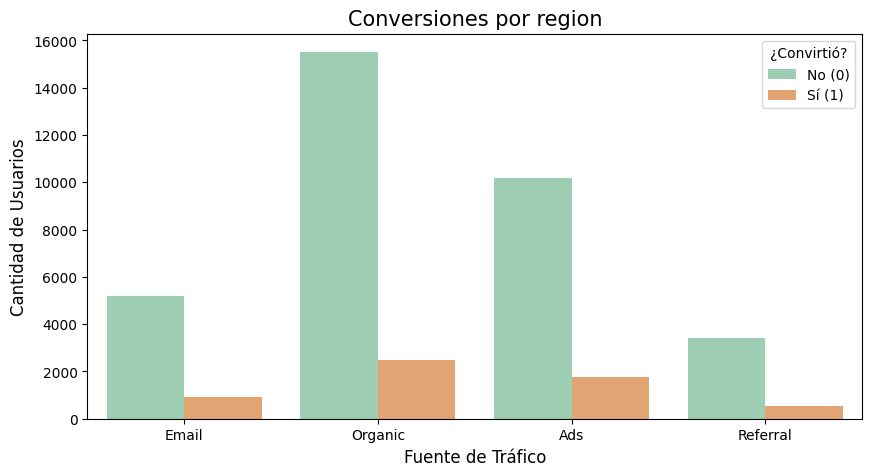

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Gráfico de barras agrupadas (Conteos absolutos)
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='traffic_source', hue='converted', palette=["#95D5B2", "#F4A261"])
plt.title('Conversiones por region', fontsize=15) # Siguiendo tu instrucción de título
plt.xlabel('Fuente de Tráfico', fontsize=12)
plt.ylabel('Cantidad de Usuarios', fontsize=12)
plt.legend(title='¿Convirtió?', labels=['No (0)', 'Sí (1)'])
plt.show()

✍️ **Comentario**: Este gráfico de barras agrupadas permite Identificar el volumen total de usuarios por canal. Podemos observar qué fuentes de tráfico (como Ads u Organic) están atrayendo la mayor cantidad de personas a la landing page. Es vital para entender el alcance bruto de nuestras campañas actuales, aunque el volumen no siempre es sinónimo de eficiencia.

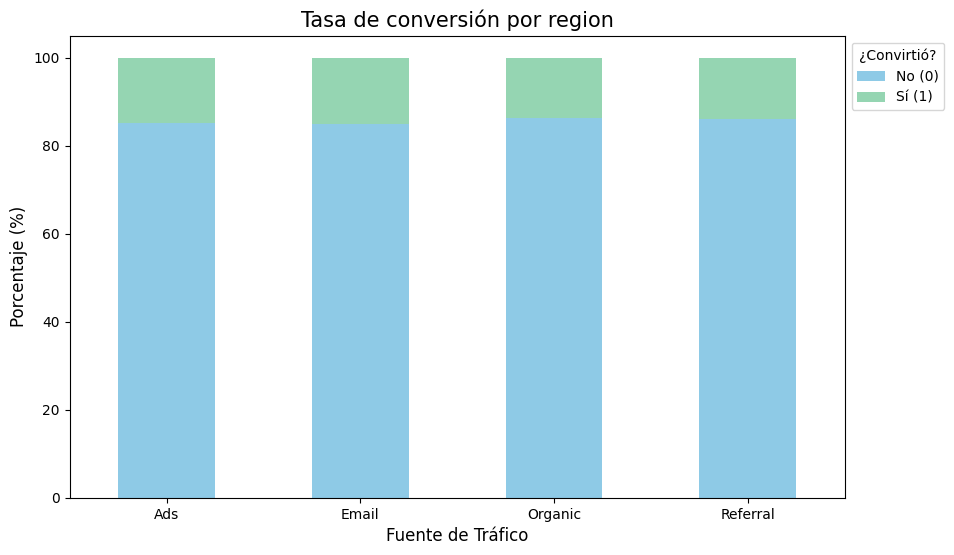

In [23]:
# 2. Gráfico de barras apiladas (Proporciones relativas)
tabla_trafico_norm = pd.crosstab(df['traffic_source'], df['converted'], normalize='index') * 100
tabla_trafico_norm.plot(kind='bar', stacked=True, figsize=(10, 6), color=["#8ecae6", "#95d5b2"])

plt.title('Tasa de conversión por region', fontsize=15) # Siguiendo tu instrucción de título
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.xlabel('Fuente de Tráfico', fontsize=12)
plt.legend(title='¿Convirtió?', labels=['No (0)', 'Sí (1)'], loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.show()

✍️ **Comentario**: Al normalizar los datos, obtenemos la Tasa de Conversión Real por canal. Este gráfico elimina el sesgo del volumen y revela qué fuente de tráfico es más efectiva convirtiendo usuarios. Si una fuente con poco volumen (ej. Email) muestra una franja verde más ancha, estamos ante un canal de alta calidad que merece una Propuesta de mayor inversión.

### Relación entre el tipo de usuario y la conversión

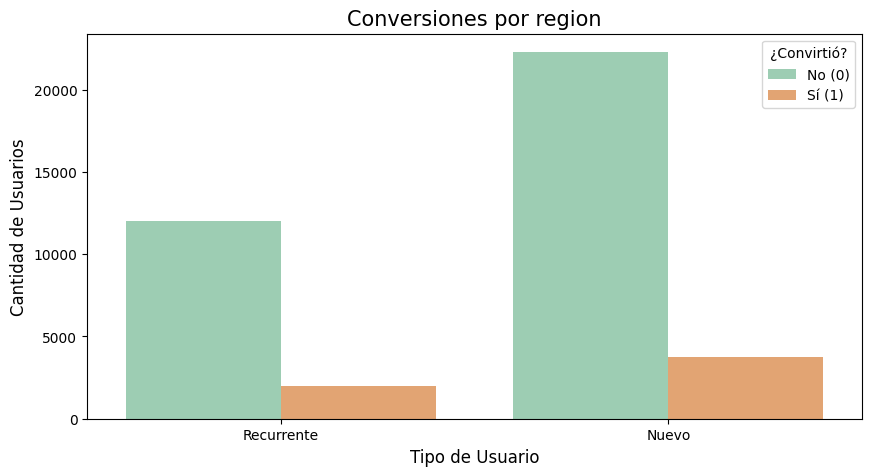

In [24]:
# 1. Gráfico de barras agrupadas (Conteos absolutos)
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='user_type', hue='converted', palette=["#95D5B2", "#F4A261"])
plt.title('Conversiones por region', fontsize=15)
plt.xlabel('Tipo de Usuario', fontsize=12)
plt.ylabel('Cantidad de Usuarios', fontsize=12)
plt.legend(title='¿Convirtió?', labels=['No (0)', 'Sí (1)'])
plt.show()

✍️ **Comentario**: Aquí visualizamos la Estructura de nuestra audiencia dividida entre usuarios Nuevos y Recurrentes. El gráfico muestra la disparidad en volumen entre ambos grupos, permitiéndonos ver si el experimento está llegando principalmente a captar nuevos prospectos o a re-interesar a clientes antiguos.

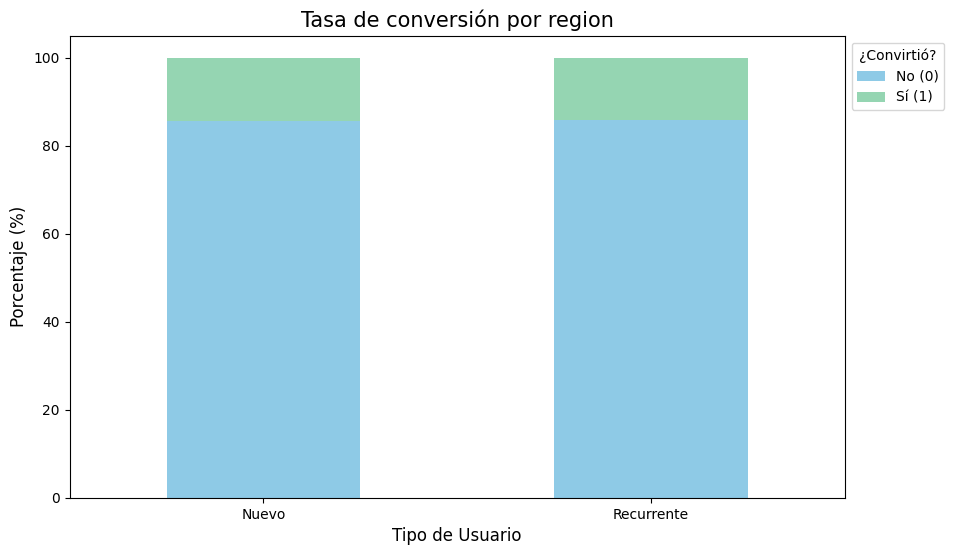

In [25]:
# 2. Gráfico de barras apiladas (Proporciones relativas)
tabla_user_norm = pd.crosstab(df['user_type'], df['converted'], normalize='index') * 100
tabla_user_norm.plot(kind='bar', stacked=True, figsize=(10, 6), color=["#8ecae6", "#95d5b2"])

plt.title('Tasa de conversión por region', fontsize=15)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.xlabel('Tipo de Usuario', fontsize=12)
plt.legend(title='¿Convirtió?', labels=['No (0)', 'Sí (1)'], loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.show()

✍️ **Comentario**: Este gráfico es definitivo para la Optimización del diseño. Si la proporción de conversión es similar entre ambos tipos de usuario, la landing page es universalmente efectiva. Si los usuarios recurrentes convierten significativamente más, la página está funcionando como un excelente recordatorio de valor para quienes ya conocen la marca.

<div class="alert alert-block alert-success">
<b>Comentario de la revisora Iteración 1.</b>

Bien hecho aquí con las comparaciones entre usuarios que convierten y no convierten y sus tipos. Como mencionas, se aprecia que las tasas de conversión son similares entre usuarios nuevos y recurrentes.

## 🧩 Paso 7. Insight Ejecutivo para Stakeholders

Se traducen los hallazgos del análisis del experimento A/B en conclusiones accionables para el negocio, enfocadas en **versión de página, conversión, gasto promedio, canales de tráfico y tipo de usuario**.

**Preguntas a responder:**  
- ¿Qué página genera mayor conversión y gasto promedio?  
- ¿Qué canales de tráfico son más efectivos para generar conversiones?  
- ¿Existen diferencias significativas según el tipo de usuario?  
- ¿Qué recomendaciones se pueden tomar para optimizar la estrategia de marketing?


---

### 🌟 Insight Ejecutivo basado en el Experimento A/B

#### 🔍 **Comparación de página (A vs B)**  

**Gasto promedio por usuario que convirtió:**
- Observacion 1: El análisis se realizó filtrando exclusivamente a los usuarios con converted = 1 para evitar sesgos por valores en cero.
- Observacion 2: Se utilizó una Prueba t de Student para comparar las medias de gasto entre ambas versiones de la landing page.
- **Interpretación:**
Si $p \geq 0.05$: No existe una diferencia significativa en el ticket promedio. Ambas páginas generan el mismo valor económico por cliente, por lo que la decisión no debe basarse en el monto de compra.

Si $p < 0.05$: Una de las versiones incentiva un mayor gasto, lo que sugiere que el diseño influye en la percepción de valor o en la selección de productos más costosos.
<br>

**Tasa de conversión:** 
- Observacion 1: La comparación se basó en el volumen de éxitos frente al total de usuarios expuestos en grupos balanceados.
- Observacion 2: Se aplicó una Prueba Z para Proporciones para validar la efectividad de cada versión en la captación de clientes.
- **Interpretación:**
Si $p < 0.05$: Hemos Identificado una versión ganadora que atrae significativamente más clientes. Esta página debe ser la base para la implementación final.

Si $p \geq 0.05$: La efectividad de ambas landing pages es equivalente; el cambio de diseño no alteró la intención de compra del usuario.

---

#### 📊 **Segmentación por fuente de tráfico**
- Observacion La Prueba Chi-cuadrada evaluó si la conversión depende del canal de origen (Ads, Organic, Email, Referral).
- **Interpretación:**
Si existe asociación ($p < 0.05$), ciertos canales son "motores de conversión" más potentes. Esto permite Optimizar la inversión hacia las fuentes que demuestran una mayor tasa de éxito relativa en los gráficos apilados.
 ---

#### 📊 **Segmentación por tipo de usuario**
- Observacion Se analizó el comportamiento de usuarios Nuevos vs. Recurrentes para detectar efectos diferenciales en la landing page.
- **Interpretación:**
El resultado nos dice si nuestra página es igual de persuasiva para un desconocido que para alguien que ya nos visitó. Una falta de asociación sugiere una página con gran capacidad de "tracción fría".
---

Las visualizaciones usadas respaldan los resultados estadísticos de pasos anteriores.

---

#### 💡 **Recomendaciones de negocio:** 
- **Implementación de Diseño:** Seleccionar la versión de la landing page que haya mostrado superioridad estadística en la Tasa de Conversión, ya que es el principal objetivo del experimento.
-  **Optimización de Presupuesto:** Reforzar la inversión en los canales de tráfico que el análisis de Chi-cuadrada y las gráficas de proporciones identificaron como los más eficientes.

<div class="alert alert-block alert-success">
<b>Comentario de la revisora Iteración 1.</b>

Excelentes conclusiones y propuestas finales de negocio frente a los resultados, has recopilado cada uno de los hallazgos convirtiendolos en acciones clave, esto es justamente lo que se espera en este nivel de analisis. Sigue así!